# Testando a classe do neurônio implementada

Essa classe é de apenas um neurônio, só é possível utilizá-la em datasets binários por enquanto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from random import randint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_breast_cancer

sys.path.append("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline_MLP/python/")
from NeuronioClass import Neuronio

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }
plt.rcParams.update(params)

## Importando um dataset

In [3]:
data   = load_breast_cancer().data
target = load_breast_cancer().target

## Testando

In [4]:
# INSTANCIANDO
objNeuronio = Neuronio()

# BOOTSTRAP
acuracias = []
for i in range(1,6):
    
    # SEPARANDO ENTRE TREINAMENTO E TESTE
    xTrain, xTest, yTrain, yTest = tts(data, target, test_size=0.25, shuffle=True)
    
    # TREINANDO
    objNeuronio.treinar(xTrain, yTrain, armazenarEvolucao=True)
    
    # PREDIZENDO
    yPred = objNeuronio.predizer(xTest)
    
    # CALCULANDO ACURACIA
    acuraciaAtual = accuracy_score(yTest, yPred)
    acuracias.append(acuraciaAtual)
    print("Acurácia na iteração " + str(i) + ": " + str(acuraciaAtual))
    
print("\n\n\nAcurácia Média:", np.mean(acuracias), "+-", np.std(acuracias))

Acurácia na iteração 1: 0.9440559440559441
Acurácia na iteração 2: 0.9230769230769231
Acurácia na iteração 3: 0.8951048951048951
Acurácia na iteração 4: 0.9020979020979021
Acurácia na iteração 5: 0.9300699300699301



Acurácia Média: 0.9188811188811188 +- 0.01801971849891627


## Analizando a última iteração

In [5]:
print("Pesos:", objNeuronio.pesos)

Pesos: [ 1.682209    3.44165    12.39918     5.7005      0.2634189  -0.31307669
 -0.62852953 -0.77866959 -0.1502088   0.54831851 -0.8218685  -0.5727343
  0.3937865  -5.581559   -0.15178344 -0.25404902  0.3339067  -0.14626649
  0.41855891 -0.34469212  2.142274    3.45299    12.3252     -7.4596
  0.71150263  0.83805609  0.02528705  0.10322375  0.0855319  -0.2888051
 -0.34      ]


In [6]:
print("Iterações até a interrupção:", objNeuronio.qtdIteracoes)

Iterações até a interrupção: 1000


Text(0, 0.5, 'Acurácia')

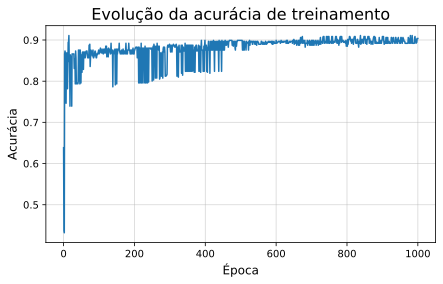

In [7]:
plt.plot(objNeuronio.evolucaoAcuracias)
plt.grid(alpha=0.5)
plt.title("Evolução da acurácia de treinamento")
plt.xlabel("Época")
plt.ylabel("Acurácia")

Text(0, 0.5, 'Peso')

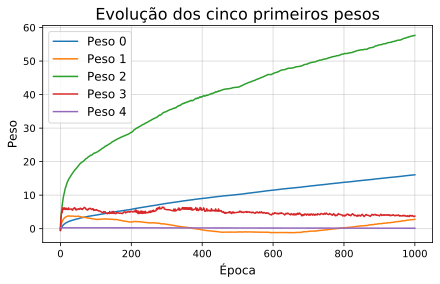

In [8]:
plt.plot(objNeuronio.evolucaoPesos[0], label="Peso 0")
plt.plot(objNeuronio.evolucaoPesos[1], label="Peso 1")
plt.plot(objNeuronio.evolucaoPesos[2], label="Peso 2")
plt.plot(objNeuronio.evolucaoPesos[3], label="Peso 3")
plt.plot(objNeuronio.evolucaoPesos[4], label="Peso 4")
plt.grid(alpha=0.5)
plt.legend()
plt.title("Evolução dos cinco primeiros pesos")
plt.xlabel("Época")
plt.ylabel("Peso")